In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Clustering and the k-means algorithm


**Contents**

- [The k-means algorithm](#1.-The-k-means-algorithm)
- [Inertia and other cluster metrics](#2.-Inertia-and-other-cluster-metrics)
- [Finding the optimal number of clusters: the elbow method](#3.-Finding-the-optimal-number-of-clusters:-the-elbow-method)

## 1. The k-means algorithm

Consider the following unlabeled toy dataset

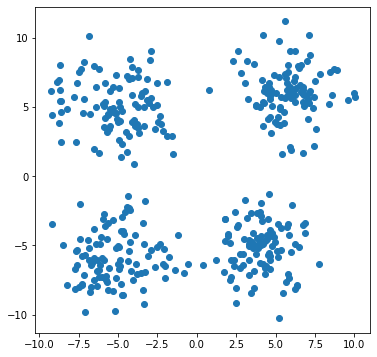

In [43]:
'four-blobs dataset'

X = np.zeros((400,2)) #2 features; 400 data points
X[0:100] =   1.75*np.random.randn(100,2) + [-5,5] # blob 1
X[100:200] = 1.75*np.random.randn(100,2) + [4,-5] # blob 2
X[200:300] = 1.75*np.random.randn(100,2) + [6,6] # blob 3
X[300:400] = 1.75*np.random.randn(100,2) + [-5,-6]

'plot dataset'
plt.figure(figsize=(6,6))
plt.plot(X[:,0],X[:,1],'o')

We can clearly see four blobs (clusters). The k-means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly.

(k-means works as follows...)

![kmeans](kmeans.gif "segment")

Let us train a $k$-means clusterer on this toy dataset.
We need to specify the number of clusters $k$ that the algorithm must find. 
In this example, it is pretty obvious from looking at the data that $k$ should be set to 4. 
In general, choosing $k$ is not that easy.
We will discuss this shortly.

In [44]:
from sklearn.cluster import KMeans
# choose number of clusters
k = 4 
# instantiate k-means clusterer
kmeans = KMeans(n_clusters = k)
# train the cluster
kmeans.fit(X)

KMeans(n_clusters=4)

The $k$-means method will try to find each blob's center and assign each point to the closest blob.

In [45]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_
centers

array([[-5.13930881,  5.07242   ],
       [-5.17819709, -5.85463794],
       [ 5.77893321,  6.08118921],
       [ 4.06435984, -5.1860902 ]])

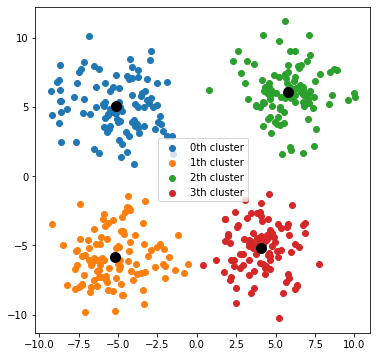

In [46]:
# plot clusters
plt.figure(figsize=(6,6))
for i in range(k):
    # plot ith cluster
    plt.scatter(X[labels==i,0],X[labels==i,1], label=str(i)+'th cluster')
    plt.scatter(centers[i,0],centers[i,1], c='k', s=100)
plt.legend()

Now that we have a trained k-means clusterer, we can assign new points to the cluster whose center is closest

In [31]:
new_points = np.array([
    [-5,-10],
    [-8,-2],
    [5,-5],
    [10,5]
])

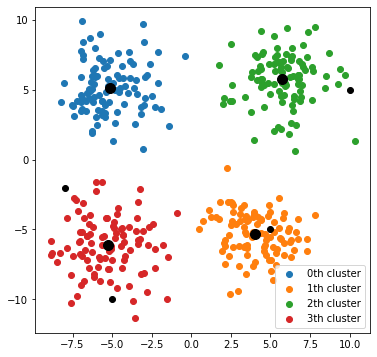

In [32]:
plt.figure(figsize=(6,6))
for i in range(k):
    # plot ith cluster
    plt.scatter(X[labels==i,0],X[labels==i,1], label=str(i)+'th cluster')
    plt.scatter(centers[i,0],centers[i,1], c='k', s=100)
plt.scatter(new_points[:,0],new_points[:,1],c='k')
plt.legend()

In [33]:
kmeans.predict(new_points)

array([3, 3, 1, 2])

If we plot the classification regions of a k-means clusterer, we'll get what is called a Voronoi tesselation

## 2. Inertia and other cluster metrics

### Inertia

The $k$-means algorithm aims to choose clusters that minimise the **inertia** (aka, the within-cluster sum-of-squares).
The **inertia** is the mean squared distance between each dataset point and its closest cluster mean.
If we denote by $C_i$ the $i$th cluster and by $m_i$ the center (the mean) of $C_i$, the inertia is given by
$$
\mbox{inertia} = \frac{1}{m}\sum_{i=1}^k \sum_{x\in C_i} \|x-m_i\|_2^2,
$$
where $m$ is the size of the dataset.

We can access the clusterer's inertia via the `inertia_` instance variable

In [47]:
kmeans.inertia_

2505.9267606488124

Inertia can be recognized as a measure of how internally coherent clusters are. Lower inertia values are better and zero is optimal.

### Silhouette score

Another cluser metric is the silhouette score.
The **silhouette score** is the mean silhouette coefficient over all the dataset points.
For a datapont $x_i$ in cluster $C_i$, its **silhouette coefficient** is computed as follows.
First, we need to compute its mean distance to the other points in the same cluster:

$$
a = \frac{1}{\mbox{size cluster $C_i$ - 1}}\sum_{x_j\in C_i}\mathrm{distance}\,(x_i,x_j).
$$

We divide by $\mbox{size cluster $C_i$ - 1}$ because we do not include the distance from $x_i$ to itself.
Secondly, we compute the mean distance to the points of the next closest cluster:

$$
b = \min_{C_k\neq C_i}\left\{ \frac{1}{\mbox{size cluster $C_k$}}\sum_{x_j\in C_k}\mathrm{distance}\,(x_i,x_j)\right\}.
$$

The **silhouette coefficient** of $x_i$ is

$$
s = \left\{
\begin{array}{ll}
\dfrac{b-a}{\max\{a,b\}} & \mbox{ if size of $C_i$ is not equal to 1}, \\
0 & \mbox{ if size of $C_i$ is equal to 1}
\end{array}
\right.
$$

The silhouette coefficient can vary between -1 and 1. 
A coefficient close to 1 means that the point is well inside its own cluster and far from other clusters. A coefficient close to 0 means that it is close to a cluster boundary. A coefficient close to -1 means that the point may have been assigned to the wrong cluster.

We can compute the clusterer's silhouete score via the `silhouette_score` sci-kit learn's function

In [48]:
from sklearn.metrics import silhouette_score
silhouette_score(X, labels)

0.6672406094905893

## 3. Finding the optimal number of clusters: the elbow method

We set the number of clusters $k$ to 4 because it was obvious by looking at the data that this was the correct number of clusters.
But in general, it is difficult to know how to set the hyperparameter $k$.
The result might be bad if you set $k$ to the wrong value.

**Example 1**: when $k$ is too small, separate clusters get merged

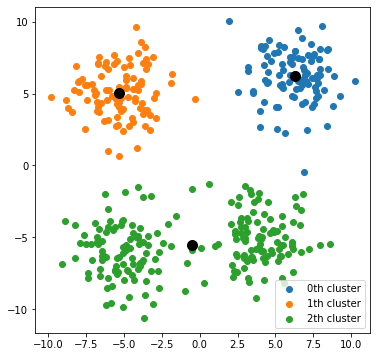

In [21]:
# choose number of clusters
k = 3 

# instantiate k-means clusterer
kmeans = KMeans(n_clusters = k)

# train the cluster
kmeans.fit(X)

# get cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# plot clusters
plt.figure(figsize=(6,6))
for i in range(k):
    # plot ith cluster
    plt.scatter(X[labels==i,0],X[labels==i,1], label=str(i)+'th cluster')
    plt.scatter(centers[i,0],centers[i,1], c='k', s=100)
plt.legend()

**Example 2:** when $k$ is too large, some clusters get chopped into multiple pieces

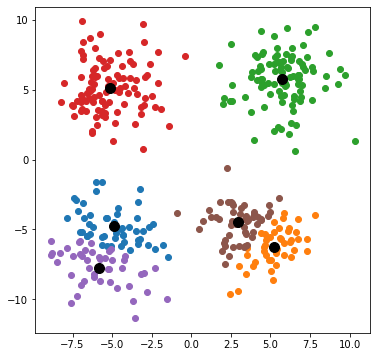

In [35]:
# choose number of clusters
k = 6 

# instantiate k-means clusterer
kmeans = KMeans(n_clusters = k)

# train the cluster
kmeans.fit(X)

# get cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# plot clusters
plt.figure(figsize=(6,6))
for i in range(k):
    # plot ith cluster
    plt.scatter(X[labels==i,0],X[labels==i,1], label=str(i)+'th cluster')
    plt.scatter(centers[i,0],centers[i,1], c='k', s=100)
#plt.legend()

### Inertia

One way to choose the number of clusters is to run the $k$-means algorithm multiple times with different values for $k$, and plot the inertia as a function of $k$. 
The inertia curve often contains an inflexion point called **the elbow**.

Text(0, 0.5, 'inertia')

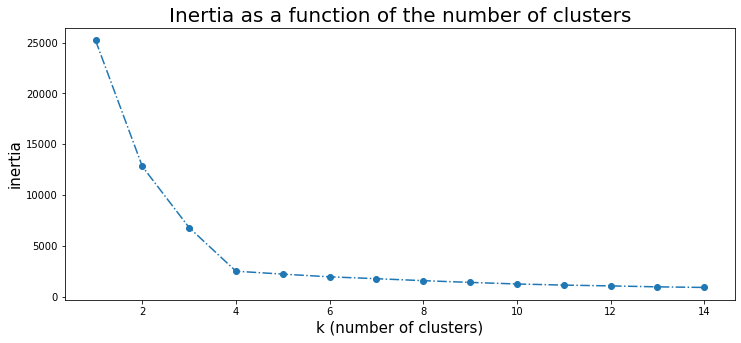

In [49]:
k_list = np.arange(1,15)
inertias = []
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(12,5))
plt.plot(k_list,inertias,'o-.')
plt.title('Inertia as a function of the number of clusters',fontsize=20)
plt.xlabel('k (number of clusters)', fontsize=15)
plt.ylabel('inertia', fontsize=15)

### Silhouette score

An alternatice approach is to use the silhouette score

Text(0, 0.5, 'silhouette score')

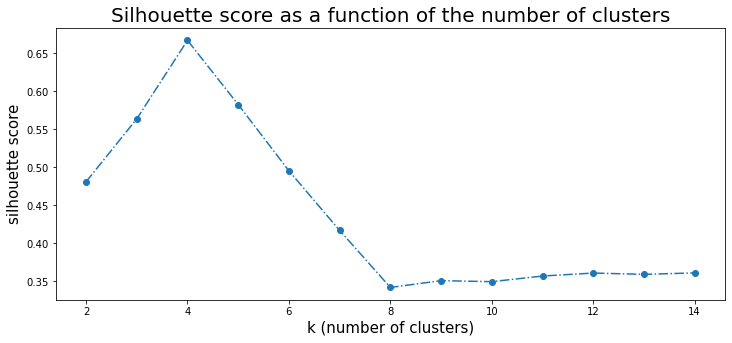

In [53]:
k_list = np.arange(2,15)
scores = []
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    scores.append(silhouette_score(X,kmeans.labels_))
    
plt.figure(figsize=(12,5))
plt.plot(k_list,scores,'o-.')
plt.title('Silhouette score as a function of the number of clusters',fontsize=20)
plt.xlabel('k (number of clusters)', fontsize=15)
plt.ylabel('silhouette score', fontsize=15)

The silhouette score confirms that $k=4$ is a good choice.

### Silhouette diagram

## 4. Demonstration of k-means assumptions

The k-means algorithm makes the assumption that clusters are [**convex**](https://en.wikipedia.org/wiki/Convex_set) and [**isotropic**](https://en.wikipedia.org/wiki/Isotropy), which is not always the case. It responds poorly to elongated clusters, or clusters with irregular shapes.

The following examples show situations where the $k$-means algorithm produces unintuitive and possibly unexpected clusters.

**Example 1:** Anisotropicly distributed data (i.e., elongated clusters)

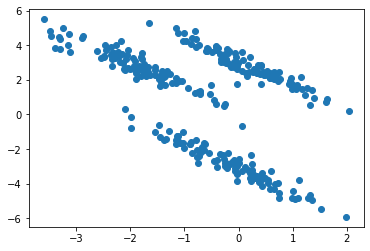

In [57]:
# three-elongated-blobs dataset
X = np.zeros([300,2])
transformation = np.array([[0.60834549, -0.63667341], [-0.40887718, 0.85253229]])

X[0:100] = np.random.randn(100,2) + [-2,2]
X[100:200] = np.random.randn(100,2) + [5,7]
X[200:300] = np.random.randn(100,2) + [-5,-7]

X = X.dot(transformation)
plt.plot(X[:,0],X[:,1],'o')

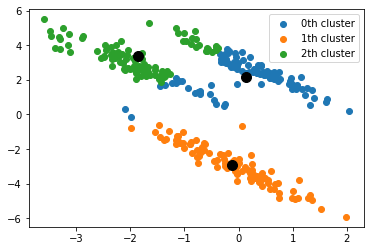

In [58]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# plot clusters
for i in range(k):
    # plot ith cluster
    plt.scatter(X[labels==i,0],X[labels==i,1], label=str(i)+'th cluster')
    plt.scatter(centers[i,0],centers[i,1], c='k', s=100)
plt.legend()

**Example 2:** Clusters with irregular shapes.

**Moons dataset**

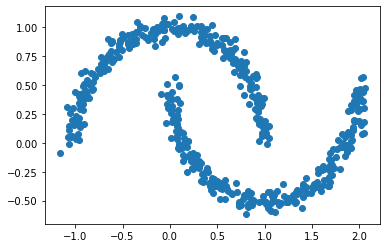

In [60]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,noise=0.05)
plt.plot(X[:,0],X[:,1],'o')

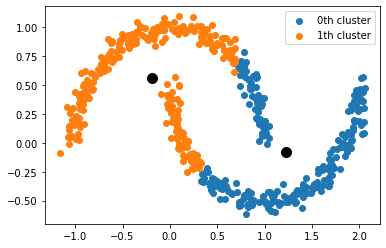

In [61]:
k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# plot clusters
for i in range(k):
    # plot ith cluster
    plt.scatter(X[labels==i,0],X[labels==i,1], label=str(i)+'th cluster')
    plt.scatter(centers[i,0],centers[i,1], c='k', s=100)
plt.legend()

**Circles dataset**

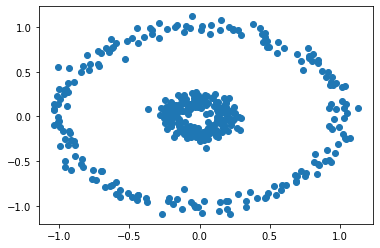

In [64]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=400,noise=0.05, factor=0.2)
plt.plot(X[:,0],X[:,1],'o')

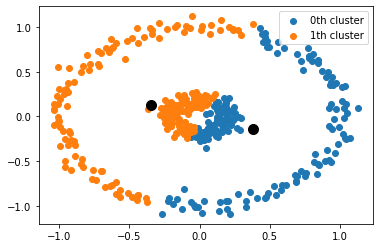

In [65]:
k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# plot clusters
for i in range(k):
    # plot ith cluster
    plt.scatter(X[labels==i,0],X[labels==i,1], label=str(i)+'th cluster')
    plt.scatter(centers[i,0],centers[i,1], c='k', s=100)
plt.legend()

**Example 3:** Unevenly sized clusters

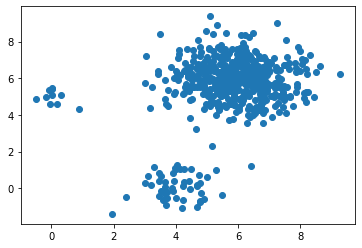

In [66]:
X = np.zeros((560,2)) 
X[0:500] = np.random.randn(500,2) + [6,6] # blob 1 (big)
X[500:550] = 0.7*np.random.randn(50,2) + [4,0] # blob 2 (medium)
X[550:560] = 0.5*np.random.randn(10,2) + [0,5] # blob 3 (small)

plt.plot(X[:,0],X[:,1],'o')

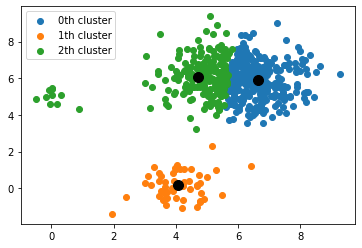

In [67]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# plot clusters
for i in range(k):
    # plot ith cluster
    plt.scatter(X[labels==i,0],X[labels==i,1], label=str(i)+'th cluster')
    plt.scatter(centers[i,0],centers[i,1], c='k', s=100)
plt.legend()